In [1]:
import numpy as np

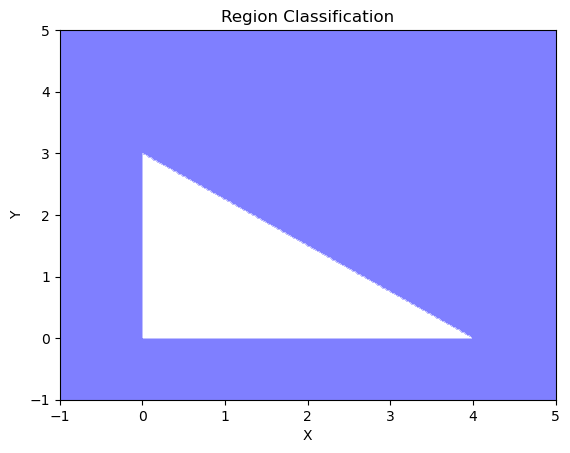

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def is_inside_area(x, y):
    if x > 0 and y > 0 and 3*y + 4*x < 12:
        return 1
    elif np.isclose(x, 0) and 0 <= y <= 4:
        return 0
    elif np.isclose(y, 0) and 0 <= x <= 3:
        return 0
    elif x > 0 and y > 0 and np.isclose(3*y + 4*x, 12):
        return 0
    return -1

# Создаем сетку точек
x_values = np.linspace(-1, 5, 400)
y_values = np.linspace(-1, 5, 400)

# Создаем массив значений функции is_inside_area для каждой точки
result_values = np.zeros((len(x_values), len(y_values)))

for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        result_values[i, j] = is_inside_area(x, y)

# Рисуем график с использованием разных цветов для значений 1, 0 и -1
plt.contourf(x_values, y_values, result_values, levels=[-1, 0, 1], colors=['blue', 'white', 'red'], alpha=0.5)

# Добавляем подписи
plt.title('Region Classification')
plt.xlabel('X')
plt.ylabel('Y')

# Отображаем график
plt.show()

In [3]:
A1 = 0
A2 = 3
B1 = 0
B2 = 4

In [16]:
import plotly.graph_objects as go

# Загрузка данных из файла
data = np.loadtxt('./parallel_23/output.txt')

# Получение размеров массива
rows, cols = data.shape

# Создание сетки для осей X и Y
x = np.linspace(A1, A2, cols)
y = np.linspace(B1, B2, rows)

X, Y = np.meshgrid(x, y)

# Создание 3D-поверхности
fig = go.Figure(data=[go.Surface(z=data, x=x, y=y, colorscale='Viridis')])

# Настройка меток осей
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                  title='Визуализация w(x,y), (M, N) = (40, 40)')

# Отображение графика
fig.show()

In [17]:
import numpy as np

def calculate_laplacian(u, h):
    rows, cols = u.shape
    laplacian = np.zeros_like(u)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            laplacian[i, j] = (u[i + 1, j] + u[i - 1, j] + u[i, j + 1] + u[i, j - 1] - 4 * u[i, j]) / (h ** 2)

    return laplacian


In [22]:
# Создание сетки для осей X и Y
x = np.linspace(A1, A2, cols)
y = np.linspace(B1, B2, rows)

X, Y = np.meshgrid(x, y)

laplasian = calculate_laplacian(data, 1.)

# Создание 3D-поверхности
fig = go.Figure(data=[go.Surface(z=laplasian, x=x, y=y, colorscale='Viridis')])

# Настройка меток осей
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                  title='Визуализация лапласиана, (M, N) = (40, 40)')

# Отображение графика
fig.show()